## Previously implemented steps with reduced dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from joblib import Parallel, delayed
from tqdm import tqdm

In [21]:
dataset = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.csv"
dataset1 = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\idx_to_feature_name.csv"
timestamp_dataset = np.load(r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development.npy")
development = pd.read_csv(dataset)

idx_to_feature_name = pd.read_csv(dataset1)

In [22]:
timestamp_dataset = np.swapaxes(timestamp_dataset, 1, 2)

x, y, z = np.shape(timestamp_dataset) # shape is 45296 44 175
print(f"x,y,z :{x,y,z}")
timestamp_dataset_xyz = timestamp_dataset.reshape((x * y, z))

print(f"timestamp_dataset_xyz shape: {np.shape(timestamp_dataset_xyz)}")

df = pd.DataFrame(timestamp_dataset_xyz)
df.columns = list(idx_to_feature_name['feature_name'])

x,y,z :(45296, 44, 175)
timestamp_dataset_xyz shape: (1993024, 175)


In [23]:
labels = development['word'].repeat(44).reset_index(drop=True)
df['label'] = labels
print(df.shape)
print(df.head())

(1993024, 176)
   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3215.288398  3163.578230    3.429333   10.210643    7.815739    9.503703   
1  3390.327986  3140.046112    1.373135    4.969057    7.083958    8.309203   
2  3458.654191  3094.048944    2.354364   11.720385    5.284093   13.498349   
3  3566.314690  3771.505801    2.519493    3.772937    6.171315   11.707870   
4  3798.595277  3539.935021    1.564043    5.580149   11.447674    8.371300   

   contrast_4  contrast_5  contrast_6  energy_0  ...  mfcc_d2_26  mfcc_d2_27  \
0   11.919620   14.669121   14.585381  1.228449  ...    0.017583    0.001675   
1   17.888832   14.893607   17.731615  0.661205  ...    0.017583    0.001675   
2   11.968940   14.713264   18.549921  0.540481  ...    0.017583    0.001675   
3    8.954777   10.262776   11.503663  0.477311  ...    0.017583    0.001675   
4    6.541367   16.620921   12.307588  0.533642  ...    0.017583    0.001675   

   mfcc_d2_28  mfcc_d2_29  mf

In [24]:
encoder = LabelEncoder()

encoded_labels = encoder.fit_transform(df['label'])

df['encoded_label'] = encoded_labels

## Split the dataset to 1/3 and shuffle

In [25]:
# Shuffle the DataFrame
shuffled_df = df.sample(frac=1).reset_index(drop=True)

(19930, 177)
   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  1605.355649   504.760672    6.478990    6.740087   14.090651   19.887028   
1  1323.605541   649.191485    4.978013   16.751772   15.512239   17.026955   
2  3419.018221  2939.919173    0.395741    1.672024    9.171288    8.916571   
3  3993.217365  3667.709740    1.060175    2.591516    6.926195   10.512524   
4  3207.630685  3221.086552    4.177683    5.740142    6.358228   10.750669   

   contrast_4  contrast_5  contrast_6   energy_0  ...  mfcc_d2_27  mfcc_d2_28  \
0   12.134502   16.600607   13.840115   2.556816  ...   -0.025042    0.025746   
1   23.031064   17.587454   20.943099  22.772978  ...    0.093161    0.078317   
2   12.903574   18.541811   14.128130   0.173857  ...   -0.002642   -0.033137   
3   12.475697   13.215121   12.214242   0.398674  ...    0.040841    0.035834   
4   13.448841   17.074945   26.172827   6.961453  ...   -0.013974   -0.060860   

   mfcc_d2_29  mfcc_d2_30

In [43]:
split_coef = 30
one_third_size = len(shuffled_df) // split_coef
new_df = shuffled_df.iloc[:one_third_size].reset_index(drop=True)

labels = development['word'].repeat(44).reset_index(drop=True)

labels = labels[:one_third_size]

new_df['label'] = labels

print(new_df.shape)
print(new_df.head())

(66434, 177)
   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  1605.355649   504.760672    6.478990    6.740087   14.090651   19.887028   
1  1323.605541   649.191485    4.978013   16.751772   15.512239   17.026955   
2  3419.018221  2939.919173    0.395741    1.672024    9.171288    8.916571   
3  3993.217365  3667.709740    1.060175    2.591516    6.926195   10.512524   
4  3207.630685  3221.086552    4.177683    5.740142    6.358228   10.750669   

   contrast_4  contrast_5  contrast_6   energy_0  ...  mfcc_d2_27  mfcc_d2_28  \
0   12.134502   16.600607   13.840115   2.556816  ...   -0.025042    0.025746   
1   23.031064   17.587454   20.943099  22.772978  ...    0.093161    0.078317   
2   12.903574   18.541811   14.128130   0.173857  ...   -0.002642   -0.033137   
3   12.475697   13.215121   12.214242   0.398674  ...    0.040841    0.035834   
4   13.448841   17.074945   26.172827   6.961453  ...   -0.013974   -0.060860   

   mfcc_d2_29  mfcc_d2_30

## New reduced correclation matrix

In [57]:
correlation_matrix = new_df.corr()

label_correlations = correlation_matrix['encoded_label'].drop('encoded_label')
print(label_correlations.shape)
label_correlations.abs().sort_values(ascending=False)

C:\Users\azatv\AppData\Local\Temp\ipykernel_21888\2064805002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


(174,)


mfcc_3         0.080905
mfcc_6         0.072252
mfcc_7         0.063519
melspect_31    0.062612
melspect_7     0.061467
                 ...   
mfcc_d_23      0.000325
mfcc_d_21      0.000321
mfcc_d_26      0.000291
mfcc_d2_2      0.000169
mfcc_d_15      0.000069
Name: encoded_label, Length: 174, dtype: float64

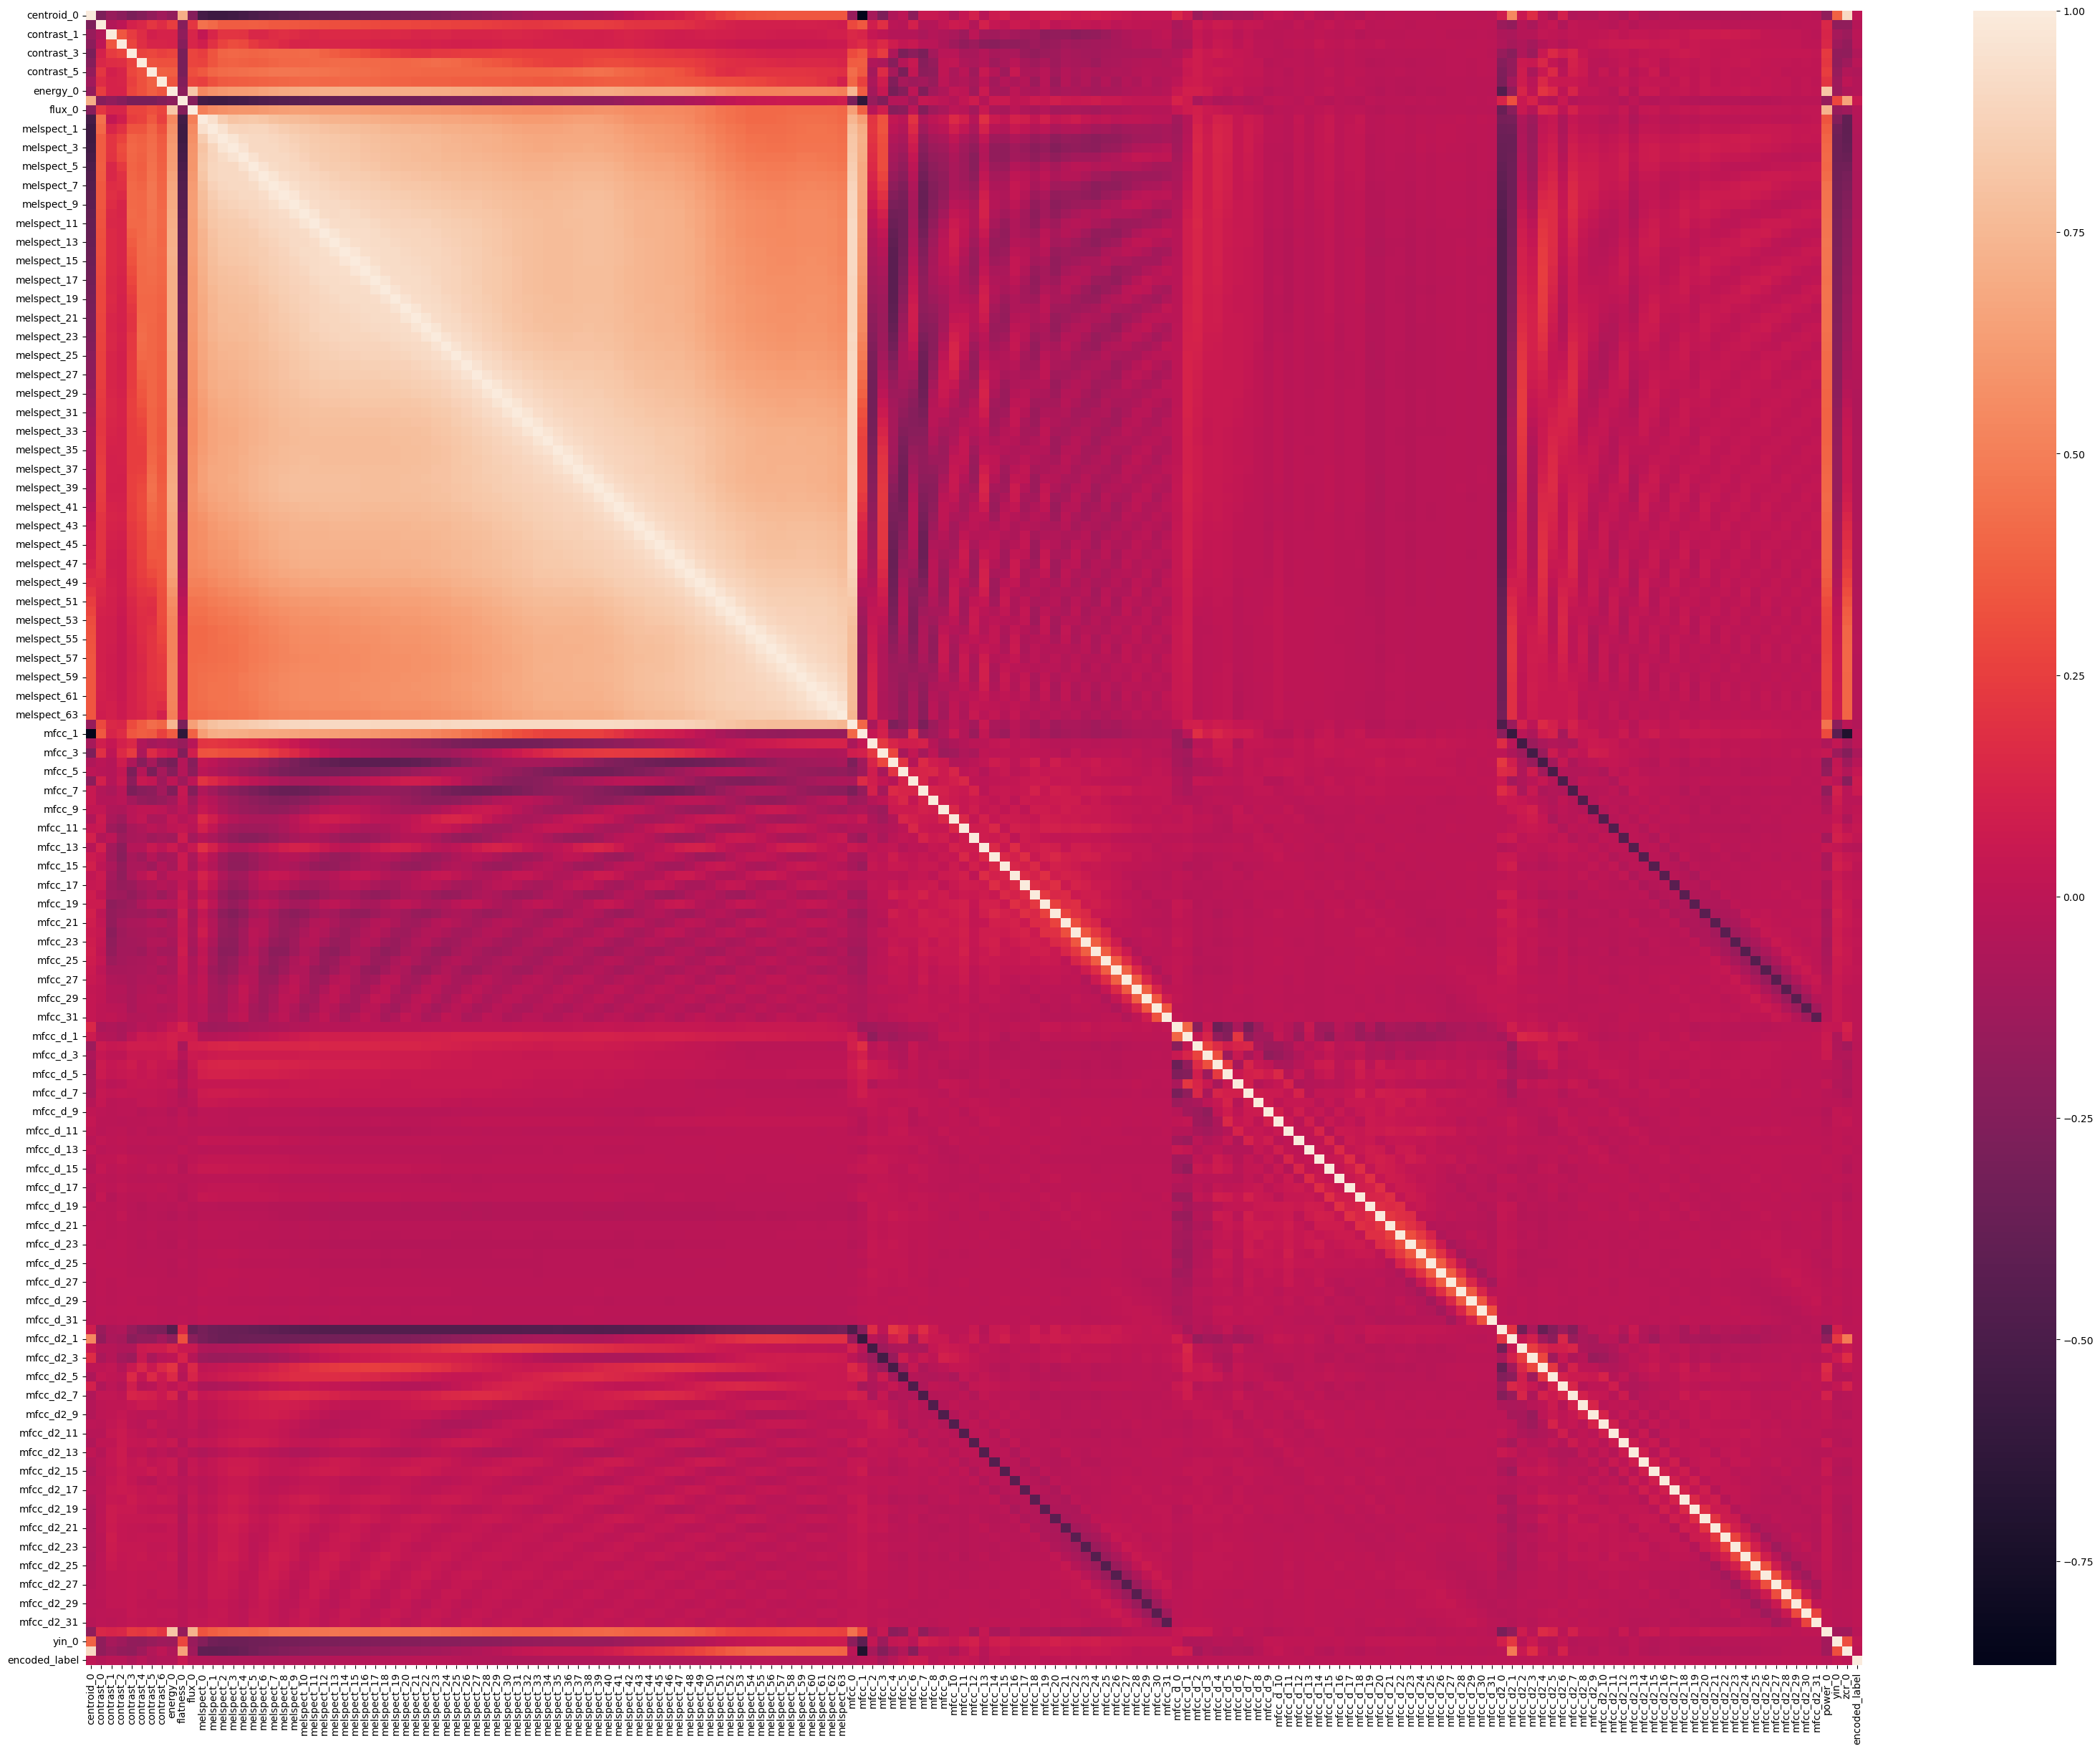

In [58]:
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix)
plt.show()

In [46]:
new_df.to_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df30.csv', index=False)

In [59]:
correlation_matrix.to_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\corr_df30.csv', index=False)

In [18]:
print(new_df.head())
print(new_df.shape)

   bandwidth_0   centroid_0  contrast_0  contrast_1  contrast_2  contrast_3  \
0  3326.226891  2710.024778   16.129260    1.435725    6.235438   12.539867   
1  1747.620095   579.818194    3.226367    1.591062   12.077102    6.225959   
2  3375.473463  3910.835382   11.087815    2.365672    9.793666    9.993524   
3  2436.408060  1325.435851    3.778993    8.145155   16.914696    8.002109   
4  2351.097937   834.487319    1.926821    8.141726    7.333704    8.984957   

   contrast_4  contrast_5  contrast_6   energy_0  ...  mfcc_d2_27  mfcc_d2_28  \
0    9.742197   18.004123   16.803288   0.217579  ...    0.070775   -0.012975   
1   17.342998   11.194997   11.536213   2.259433  ...    0.047232   -0.011456   
2   15.059186   19.134517   21.273900  21.169769  ...    0.101117    0.014161   
3   11.868986   20.061151   18.008397   3.633549  ...    0.078125    0.044003   
4   10.619509   16.062112   14.647236   0.640783  ...   -0.070689   -0.022922   

   mfcc_d2_29  mfcc_d2_30  mfcc_d2_31 

## Creating classifier based on the new number of samples

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from joblib import Parallel, delayed
from tqdm import tqdm

In [8]:
new_df_cv = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df100.csv', index_col=0)
new_df = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df20.csv', index_col=0)

In [9]:
features = new_df_cv.drop(columns=['label', 'encoded_label'])
labels = new_df_cv['encoded_label']

print(f'Features shape: {features.shape}')
print(f'Labels shape: {labels.shape}')

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Features shape: (19930, 174)
Labels shape: (19930,)
Training data shape: (15944, 174)
Testing data shape: (3986, 174)


In [10]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
reg.fit(features, labels)
importance = reg.feature_importances_

In [11]:
print(importance)

[0.00484338 0.00686436 0.00682229 0.00661725 0.00675144 0.00720028
 0.00685544 0.00659428 0.0020645  0.00530339 0.00386754 0.0044233
 0.00387739 0.00327041 0.00341322 0.00323813 0.00337067 0.00382573
 0.00328259 0.00439489 0.00308372 0.0030672  0.00321188 0.00457919
 0.00332404 0.00314266 0.00315217 0.00305572 0.0031049  0.00356765
 0.00375229 0.00353059 0.00428811 0.00389077 0.0042354  0.00344757
 0.00347646 0.00332284 0.00317492 0.00322778 0.00277699 0.00366609
 0.00392885 0.00398203 0.00327152 0.00312362 0.00304847 0.0033927
 0.00275926 0.00278345 0.00312282 0.00302291 0.00258439 0.00282116
 0.00339311 0.00307616 0.00260534 0.0026841  0.00295198 0.00309197
 0.00331222 0.00335869 0.00280245 0.00283541 0.00272177 0.00272874
 0.00276222 0.00258116 0.00248103 0.00239374 0.00258273 0.00277961
 0.00258188 0.00278658 0.00338777 0.0014855  0.00469849 0.00657495
 0.01438978 0.00716342 0.00717193 0.01060095 0.00778192 0.00680255
 0.00712618 0.00636583 0.00621623 0.00642926 0.00660508 0.007283

## Working with 100 split dataset

In [12]:
new_df = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df100.csv', index_col=0)


features = new_df.drop(columns=['label', 'encoded_label'])
labels = new_df['encoded_label']

In [13]:
feature_importances = pd.DataFrame({'feature': features.columns, 'importance': importance})

reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
reg.fit(features, labels)
importance = reg.feature_importances_

feature_importances = feature_importances.sort_values(by='importance', ascending=False)

print(feature_importances)

threshold = 0.01
important_features = feature_importances[feature_importances['importance'] > threshold]['feature'].tolist()

print(f'Selected important features: {important_features}')

         feature  importance
108     mfcc_d_1    0.017575
142    mfcc_d2_3    0.017091
107     mfcc_d_0    0.016051
78        mfcc_3    0.014390
109     mfcc_d_2    0.013648
..           ...         ...
67   melspect_56    0.002581
68   melspect_57    0.002481
69   melspect_58    0.002394
8       energy_0    0.002064
75        mfcc_0    0.001486

[174 rows x 2 columns]
Selected important features: ['mfcc_d_1', 'mfcc_d2_3', 'mfcc_d_0', 'mfcc_3', 'mfcc_d_2', 'mfcc_d2_1', 'mfcc_d_3', 'mfcc_d_4', 'mfcc_d2_0', 'mfcc_6', 'mfcc_d2_4', 'mfcc_d_5']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_features = new_df[important_features]
labels = new_df['encoded_label']

X_train, X_temp, y_train, y_temp = train_test_split(selected_features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train)
X_val_selected = scaler.transform(X_val)
X_test_selected = scaler.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}

best_classifiers = {}
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)
    best_classifiers[clf_name] = grid_search.best_estimator_
    print(f"Best {clf_name} parameters: {grid_search.best_params_}")
    print(f"Best {clf_name} cross-validation accuracy: {grid_search.best_score_}")

for clf_name, clf in best_classifiers.items():
    val_accuracy = clf.score(X_val_selected, y_val)
    print(f"{clf_name} validation accuracy: {val_accuracy}")

Training RandomForest...
Best RandomForest parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best RandomForest cross-validation accuracy: 0.2869210626807048
Training SVM...
